# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Algorytmy genetyczne - Lab 3 - Zadania (obowiązkowe)
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Zadanie 1 (1pkt.)

Zgodnie z instrukcjami prowadzącego, wybierz funkcję testową ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima" (z wyjątkiem funkcji nr 6).

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

In [2]:
125691%16 + 1

12

In [2]:
import math
import numpy as np

# testowa funkcja celu
# x - jednowymiarowa tablica ndarray
def obj_func(x):
    return 10*2 + (x**2 - 10 * np.cos(2*np.pi*x)).sum()
    

## Zadanie 2 (1pkt.)

Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

<IPython.core.display.Javascript object>


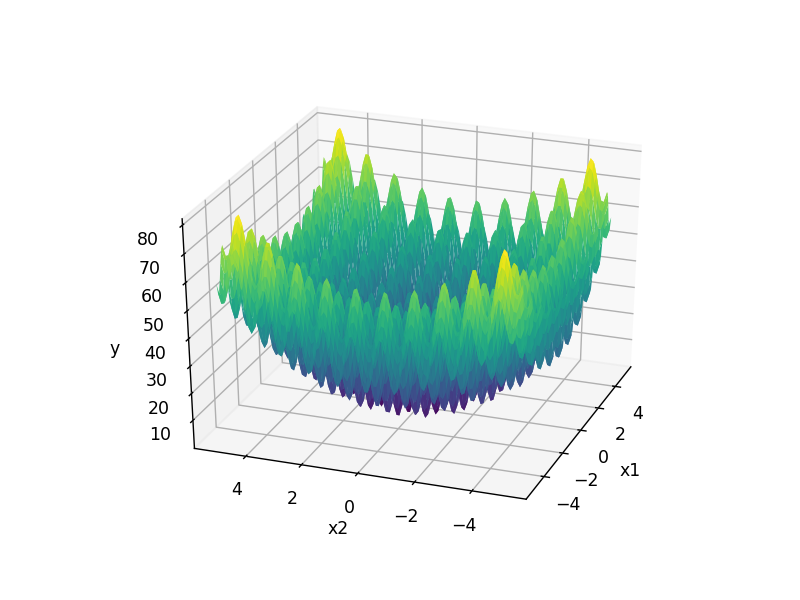

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

 # przygotowanie siatki
sampled_x1_x2 = np.linspace(-5.12, 5.12, 100)
x1, x2 = np.meshgrid(sampled_x1_x2, sampled_x1_x2)
y = np.zeros((len(sampled_x1_x2), len(sampled_x1_x2)))

for i in range(len(sampled_x1_x2)):
    for j in range(len(sampled_x1_x2)):
        y[i, j] = obj_func(np.array([x1[i][j], x2[i][j]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 200)

## Zadanie 3 (2pkt.)

Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

In [4]:
import math
import numpy as np


def nbits(a, b, dx):
    """
    a - początek przedziału, liczba rzeczywista.
    b - koniec przedziału, liczba rzeczywista.
    dx - krok, dokładność kodowania, liczba rzeczywista.
    B - liczba bitów, liczba całkowita.
    dx_new - nowy dokładniejszy krok, liczba rzeczywista.
    """
    B = math.ceil(math.log(abs(b - a)/dx, 2))
    n = 2**B
    dx_new = abs(b - a)/n
    return B, dx_new


def gen_population(P, N, B):
    """
    P - liczba osobników, liczba całkowita.
    N - liczba zmiennych, liczba całkowita.
    B - liczba bitów na każdą ze zmiennych, liczba całkowita.
    pop - populacja zakodowanych osobników, tablica ndarray
    """
    pop = np.random.randint(2, size=(P, N*B))
    return pop


def decode_individual(individual, N, B, a, dx):
    """
    :param individual: osobnik binarny kodujący N zmiennych rzeczywistych, tablica ndarray
    :param N: liczba zmiennych, liczba całkowita
    :param B: liczba bitów na każdą ze zmiennych, liczba całkowita.
    :param a: początek przedziału, liczba rzeczywsta, dla każdej zmiennej taki sam.
    :param dx: krok, dokładność kodowania, taki sam dla każdej zmiennej.
    :return: rozkodowany osobnik, tablica ndarray zawierająca N zmiennych rzeczywistych.
    """
    decoded_individual = np.ndarray(shape=N, dtype="float")
    for i in range(N):
        sum = 0
        for j in range(B):
            sum += individual[i * B + j] * (2 ** (B-j-1))
        decoded_individual[i] = a + (sum * dx)

    return decoded_individual


def evaluate_population(func, pop, N, B, a, dx):
    """
    :param func:  funkcja celu (przystosowania).
    :param pop: populacja zakodowanych osobników, tablica ndarray.
    :param N: liczba zmiennych, liczba całkowita.
    :param B: liczba bitów na każdą ze zmiennych, liczba całkowita.
    :param a: początek przedziału, liczba rzeczywsta, dla każdej zmiennej taki sam.
    :param dx: krok, dokładność kodowania, taki sam dla każdej zmiennej.
    :return: tablica ndarray zawierająca wartości funkcji celu dla poszczególnych osobników.
    """
    P = len(pop)
    evaluated_pop = np.ndarray(shape=P, dtype="float")
    for i in range(P):
        evaluated_pop[i] = func(decode_individual(pop[i], N, B, a, dx))
    return evaluated_pop


def get_best(pop, evaluated_pop):
    """
    :param pop: populacja zakodowanych osobników, tablica ndarray.
    :param evaluated_pop: tablica ndarray ocen osobników.
    :return: best_individual - najlepszy osobnik (zakodowany), tablica ndarray.
             best_value - wartość najlepszego osobnika, liczba rzeczywista.
    """
    best_individual = pop[0]
    best_value = abs(evaluated_pop[0])
    for i in range(len(evaluated_pop)):
        new_best = abs(evaluated_pop[i])
        if new_best < best_value:
            best_value = new_best
            best_individual = pop[i]
    return best_individual, best_value


def roulette(pop, evaluated_pop):
    """
    :param pop: populacja zakodowanych osobników, tablica ndarray.
    :param evaluated_pop: tablica ndarray ocen osobników.
    :return: nowa populacja wybranych osobników (zakodowanych), tablica ndarray.
    """
    length_eval_pop = len(evaluated_pop)
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")

    sum = 0
    for i in range(length_eval_pop):
        sum += abs(evaluated_pop[i] + 1.0)
    tmp_array = np.ndarray(shape=length_eval_pop, dtype="float")
    sum_smash = 0
    for i in range(length_eval_pop):
        tmp_array[i] =  (evaluated_pop[i] + 1.0) / sum 
        sum_smash += sum / tmp_array[i]
    probability_array = np.ndarray(shape=length_eval_pop, dtype="float")
    probability_array[0] = sum / (tmp_array[0]*sum_smash)
    for i in range(length_eval_pop-1):
        probability_array[i+1] = sum / ((tmp_array[i+1])*sum_smash) + probability_array[i]
    for i in range(length_eval_pop):
        random = np.random.random()
        for j in range(length_eval_pop):
            if probability_array[j] >= random:
                new_pop[i] = pop[j]
                break
    return new_pop


def cross(pop, pk):
    """
    :param pop: populacja zakodowanych osobników, tablica ndarray.
    :param pk: prawdopodobieństwo krzyżowania dla pary osobników. Liczba rzeczywista z przedziału [0,1].
    :return: nowa populacja osobników po krzyżowaniu (zakodowanych), tablica ndarray.
    """
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    for i in range(0, len(pop) - 1, 2):
        if np.random.random() < pk:
            cross_point = len(pop[0]/2)
            for j in range(cross_point):
                new_pop[i][j] = pop[i][j]
                new_pop[i + 1][j] = pop[i + 1][j]
            for j in range(cross_point, len(pop[0])):
                new_pop[i][j] = pop[i + 1][j]
                new_pop[i + 1][j] = pop[i][j]
        else:
            new_pop[i] = pop[i]
            new_pop[i + 1] = pop[i + 1]
        if len(pop) % 2 == 1:
            new_pop[len(pop) - 1] = pop[len(pop) - 1]
    return new_pop


def mutate(pop, pm):
    """
    :param pop: populacja zakodowanych osobników, tablica ndarray.
    :param pm: prawdopodobieństwo mutacji dla pojedynczego bitu. Liczba rzeczywista z przedziału [0,1].
    :return: nowa populacja osobników po mutacji (zakodowanych), tablica ndarray.
    """
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    for i in range(len(pop)):
        for j in range(len(pop[i])):
            if (np.random.random() <= pm):
                new_pop[i][j] = abs(pop[i][j] - 1)
            else:
                new_pop[i][j] = pop[i][j]
    return new_pop


def evolution(fun, pop_size, pk, pm, generations, dx):
    """
    :param fun: funkcja, której maksimum ma zostać znalezione
    :param pop_size: rozmiar populacji
    :param pk: prawdopodobieństwo krzyżowania
    :param pm: prawdopodobieństwo mutacji
    :param generations: liczba pokoleń
    :param dx: dokładność kodowania
    :return: best_sol: najlepsze znalezione rozwiązanie (nieważne, w której iteracji
            best_generation: numer pokolenia, z którego pochodzi najlepsze rozwiązanie
            list_best: lista z najlepszą oceną osobnika w każdym pokoleniu
                        (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
            list_best_generation: lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
            list_mean: lista z wartościami średnimi ocen osobników z każdego pokolenia
     """
    # Zmienne globalne potrzebne do wykresow w zadaniu 4
    global first_gen, mid_gen, last_gen, first_eval_gen, mid_eval_gen, last_eval_gen
    
    begin = -5.12
    end = 5.12
    N = 2
    B, dx_new = nbits(begin, end, dx)
    pop = gen_population(pop_size, N, B)
    min = 100
    best_sol = np.ndarray(shape=B, dtype="int")
    best_generation = 0
    list_best = np.ndarray(shape=generations, dtype="float")
    list_best_generation = np.ndarray(shape=generations, dtype="float")
    list_mean = np.ndarray(shape=generations, dtype="float")
    new_pop = pop
    for i in range(generations):
        evaluated_pop = evaluate_population(fun, new_pop, N, B, begin, dx_new)
        new_best_sol = get_best(new_pop, evaluated_pop)
        if i == 0:
            first_gen = np.ndarray(shape=(2, pop_size), dtype="float")
            for j in range(pop_size):
                first_gen[0][j], first_gen[1][j] = decode_individual(new_pop[j], N, B, begin, dx_new)
            first_eval_gen = evaluated_pop
        elif i == generations / 2:
            mid_gen = np.ndarray(shape=(2, pop_size), dtype="float")
            for j in range(pop_size):
                mid_gen[0][j], mid_gen[1][j] = decode_individual(new_pop[j], N, B, begin, dx_new)
            mid_eval_gen = evaluated_pop
        elif i == generations - 1:
            last_gen = np.ndarray(shape=(2, pop_size), dtype="float")
            for j in range(pop_size):
                last_gen[0][j], last_gen[1][j] = decode_individual(new_pop[j], N, B, begin, dx_new)
            last_eval_gen = evaluated_pop
        list_best_generation[i] = new_best_sol[1]
        if new_best_sol[1] < best_sol[1]:
            best_sol = new_best_sol
            best_generation = i

        list_best[i] = list_best_generation[best_generation]
        list_mean[i] = np.average(evaluated_pop)
        new_pop = roulette(new_pop, evaluated_pop)
        new_pop = cross(new_pop, pk)
        new_pop = mutate(new_pop, pm)
    return best_sol, best_generation, list_best, list_best_generation, list_mean


## Zadnie 4 (1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

<IPython.core.display.Javascript object>


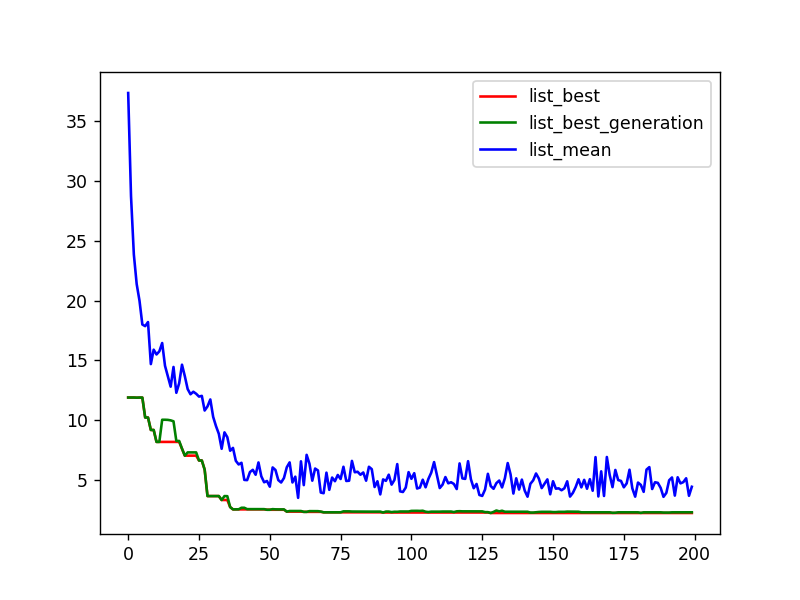

<IPython.core.display.Javascript object>


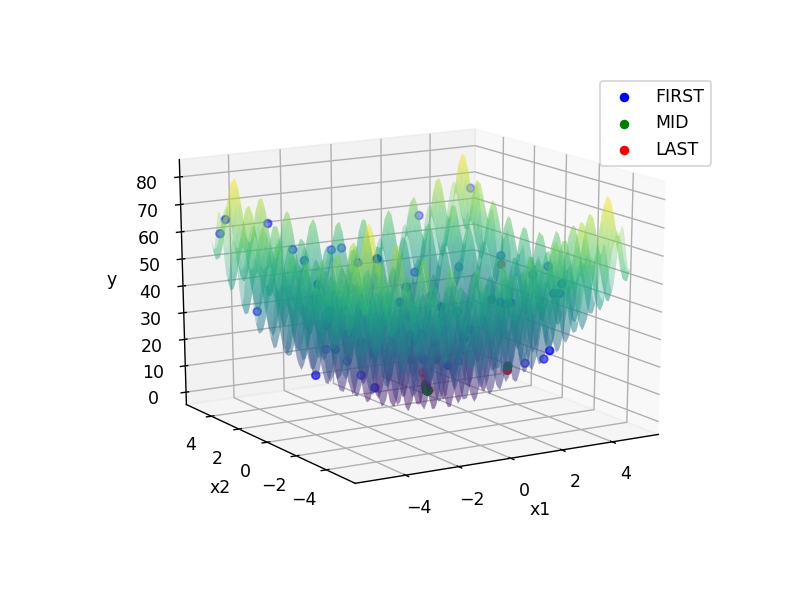

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
best_sol, best_generation, list_best, list_best_generation, list_mean = evolution(obj_func, 60, 0.7, 0.01, 200, 1e-10)


def chart_3D(first_gen, first_eval_gen, mid_gen, mid_eval_gen, last_gen, last_eval_gen):
    sampled_x1_x2 = np.linspace(-5.12, 5.12, 100)
    x1, x2 = np.meshgrid(sampled_x1_x2, sampled_x1_x2)
    y = np.zeros((len(sampled_x1_x2), len(sampled_x1_x2)))

    for i in range(len(sampled_x1_x2)):
        for j in range(len(sampled_x1_x2)):
            y[i, j] = obj_func(np.array([x1[i][j], x2[i][j]]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap='viridis', alpha=0.3, linewidth=0.4, antialiased=True)

    ax.scatter(first_gen[0], first_gen[1], first_eval_gen, label='FIRST', c="b")
    ax.scatter(mid_gen[0], mid_gen[1], mid_eval_gen, label='MID', c="g")
    ax.scatter(last_gen[0], last_gen[1], last_eval_gen, label='LAST', c="r")

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    plt.show()


def show_2D_diagram(list_best, list_best_generation, list_mean):
    t1 = np.arange(0, len(list_best), 1)

    plt.figure()
    plt.subplot(111)
    line1, = plt.plot(t1, list_best, 'r')
    line2, = plt.plot(t1, list_best_generation, 'g')
    line3, = plt.plot(t1, list_mean, 'b')

    plt.legend((line1, line2, line3), ('list_best', 'list_best_generation', 'list_mean'))
    plt.show()

show_2D_diagram(list_best, list_best_generation, list_mean)
chart_3D(first_gen, first_eval_gen, mid_gen, mid_eval_gen, last_gen, last_eval_gen)

## Zadanie 5 (5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

In [9]:
import pandas as pd

exec_num = 10 # lub więcej

#pytanie 1
pop_size = 60 #wielkosc populacji
pk = 0.7 #prawdopodobienstwo krzyzowania
pm = 0.01 #prawdopodobienstwo mutacji
generations = 200 # ilość generacji
dx = 1e-10 #krok

#pytanie 2
generations2 = [100, 500, 1000, 5000, 10000]

#pytanie 3
pm3 = 0.0

#pytanie 4
pk4 = 0.0

#pytanie 5
pop_size5 = [20, 100]
generations5 = [100, 20]

df_pytanie1 = pd.DataFrame()
df_pytanie2 = []
for i in range(len(generations2)):
    df_pytanie2.append(pd.DataFrame())
    
df_pytanie3 = pd.DataFrame()
df_pytanie4 = pd.DataFrame()
df_pytanie5_ps = pd.DataFrame()
df_pytanie5_gn = pd.DataFrame()

for i in range(exec_num):
    ev1 = evolution(obj_func, pop_size, pk, pm, generations, dx)
    df_pytanie1 = df_pytanie1.append( pd.DataFrame([[ ev1[0][1], ev1[1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )
    
    ev2 = []
    for j in range(len(generations2)):
        ev2.append( evolution(obj_func, pop_size, pk, pm, generations2[j], dx) )
        df_pytanie2[j] = df_pytanie2[j].append( pd.DataFrame([[ ev2[j][0][1], ev2[j][1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )
    
    ev3 = evolution(obj_func, pop_size, pk, pm3, generations, dx)
    df_pytanie3 = df_pytanie3.append( pd.DataFrame([[ ev3[0][1], ev3[1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )
    
    ev4 = evolution(obj_func, pop_size, pk4, pm, generations, dx)
    df_pytanie4 = df_pytanie4.append( pd.DataFrame([[ ev4[0][1], ev4[1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )
    
    ev5 = []
    ev5.append( evolution(obj_func, pop_size5[0], pk, pm, generations5[0], dx) )
    df_pytanie5_ps = df_pytanie5_ps.append( pd.DataFrame([[ ev5[0][0][1], ev5[0][1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )
    
    ev5.append(  evolution(obj_func, pop_size5[1], pk, pm, generations5[1], dx) )
    df_pytanie5_gn = df_pytanie5_gn.append( pd.DataFrame([[ ev5[1][0][1], ev5[1][1] ]], columns=['wartosc przystosowania', 'nr najlepszej generacji'], index=[i] ) )


print('1. Typowe ustawienia parametrów')
avg_value = df_pytanie1.mean()[0]
std_value = df_pytanie1.std()[0]
avg_no_gen = df_pytanie1.mean()[1]
std_no_gen = df_pytanie1.std()[1]
table = pd.DataFrame([[avg_value, std_value, avg_no_gen, std_no_gen]], columns=['srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'])
display(table)

print('2. Różne ilości generacji')
table = pd.DataFrame()
for i in range(len(generations2)):
    avg_value = df_pytanie2[i].mean()[0]
    std_value = df_pytanie2[i].std()[0]
    avg_no_gen = df_pytanie2[i].mean()[1]
    std_no_gen = df_pytanie2[i].std()[1]
    table = table.append( pd.DataFrame([[generations2[i], avg_value, std_value, avg_no_gen, std_no_gen]], columns=['Ilosc generacji', 'srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'], index=[i]) )
display(table)

print('3. Prawdopodobieństwo mutacji = 0')
avg_value = df_pytanie3.mean()[0]
std_value = df_pytanie3.std()[0]
avg_no_gen = df_pytanie3.mean()[1]
std_no_gen = df_pytanie3.std()[1]
table = pd.DataFrame([[avg_value, std_value, avg_no_gen, std_no_gen]], columns=['srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'])
display(table)

print('4. Prawdopodobnieństwo krzyzowania = 0')
avg_value = df_pytanie4.mean()[0]
std_value = df_pytanie4.std()[0]
avg_no_gen = df_pytanie4.mean()[1]
std_no_gen = df_pytanie4.std()[1]
table = pd.DataFrame([[avg_value, std_value, avg_no_gen, std_no_gen]], columns=['srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'])
display(table)

print('5. pop_size=20, generations=100 vs. pop_size=100, generations=20')
avg_value = df_pytanie5_ps.mean()[0]
std_value = df_pytanie5_ps.std()[0]
avg_no_gen = df_pytanie5_ps.mean()[1]
std_no_gen = df_pytanie5_ps.std()[1]
table = pd.DataFrame([[avg_value, std_value, avg_no_gen, std_no_gen]], columns=['srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'], index=['pop=20 gen=100'])
avg_value = df_pytanie5_gn.mean()[0]
std_value = df_pytanie5_gn.std()[0]
avg_no_gen = df_pytanie5_gn.mean()[1]
std_no_gen = df_pytanie5_gn.std()[1]
table = table.append( pd.DataFrame([[avg_value, std_value, avg_no_gen, std_no_gen]], columns=['srednia wartosc','odchylenie wartosci','sredni nr generacji','odchylenie nr generacji'], index=['pop=100 gen=20']) )
display(table)

1. Typowe ustawienia parametrów


,srednia wartosc,odchylenie wartosci,sredni nr generacji,odchylenie nr generacji
0,0.925281,0.775235,160.0,44.885038


2. Różne ilości generacji


,Ilosc generacji,srednia wartosc,odchylenie wartosci,sredni nr generacji,odchylenie nr generacji
0,100,1.410768,0.785747,74.6,29.556725
1,500,0.322063,0.559712,304.6,140.654976
2,1000,0.618134,0.651538,543.7,345.847767
3,5000,0.323838,0.522678,3304.5,1528.140719
4,10000,0.361969,0.583316,5148.8,3624.593182


3. Prawdopodobieństwo mutacji = 0


,srednia wartosc,odchylenie wartosci,sredni nr generacji,odchylenie nr generacji
0,5.904591,2.372358,0.0,0.0


4. Prawdopodobnieństwo krzyzowania = 0


,srednia wartosc,odchylenie wartosci,sredni nr generacji,odchylenie nr generacji
0,1.103686,0.816755,163.4,37.420137


5. pop_size=20, generations=100 vs. pop_size=100, generations=20


,srednia wartosc,odchylenie wartosci,sredni nr generacji,odchylenie nr generacji
pop=20 gen=100,2.171654,2.002407,74.0,31.577066
pop=100 gen=20,2.014967,1.288180,14.4,3.533962


UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

ANALIZA UZYSKANYCH WYNIKÓW:

1. Globalnym minimum w zadanej funkcji jest 0.0 i znajduje się w punkcie zerowym układu współrzędnych. Przy zastosowaniu typowych ustawień algorytmu genetycznego, najlepsze uzyskane średnie rozwiązanie (0.925281) jest dość satysfakcjonujące. 

2. Spodziewanym wynikiem w przypadku wydłużania ewolucji jest poprawa w uzyskanych wartościach, a numer generacji, w której zostanie wyłoniony najlepszy osobnik powinien się również zwiększać. Powyższe wyniki pokazują, jak duży wpływ ma losowość w procesie ewolucji. Zaskakująco najlepsze średnie rozwiązanie (0.322063) udało się znaleźć przy utworzeniu 500 generacji, średnio w 304.6 generacji. Warto też zauwważyć, że dla wszystkich wywołań średni numer generacji, w której znalezione jest najlepsze rozwiązanie, przekracza połowę wszystkich generacji.

3. Mutacja jest nieodłącznym elementem Algorytmu genetycznego. Bez niej populacja ogranicza się do jednego osobnika krzyżującego się ze sobą samym. Uzyskane wyniki to potwierdzają, ponieważ nalepsze rozwiązanie za każdym razem jest znalezione w zerowej generacji a jego średnia wartość jest daleka od dokładnej wartości.

4. W przeciwieństwie do mutacji, krzyżowanie nie jest niezbędne do działania Algorytmu genetycznego, jednak ma znaczący wpływ na dokładność w wyznaczeniu rozwiązania co można potwierdzić porównując wyniki uzyskane bez krzyżowania z wynikami z zadania 1.

5. Dla zadanych parametrów, jendoznacznie można stwierdzić, że lepiej krótko ewoluować większą populację.

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>